# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Rasyid Alfiansyah]
- **Email:** [rasyidalfiansyh@gmail.com]
- **ID Dicoding:** [rasyidalfiansyh]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren bulanan rata-rata PM2.5 di stasiun perkotaan (Aotizhongxin) vs. pinggiran (Huairou) dari 2013-2017?
- Apakah kecepatan angin (WSPM) dan suhu (TEMP) berkorelasi signifikan dengan tingkat PM2.5 di stasiun Dongsi?

## Import Semua Packages/Library yang Digunakan

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from io import StringIO

# Setting style
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [47]:
# Base URL GitHub raw content
base_url = "https://raw.githubusercontent.com/107rasyid/belajar-analisis-data-dengan-python/main/data/"

# Daftar file CSV di folder GitHub (kamu bisa tambahkan sesuai isi repo)
filenames = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

# Tampilkan 5 nama file pertama sebagai sampel
print("Contoh nama file:\n", filenames[:5])

Contoh nama file:
 ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv']


**Insight:**
- Data yang digunakan terdiri dari 12 file CSV yang masing-masing berisi data pencemaran udara di berbagai lokasi di Beijing dari tahun 2013 hingga 2017.
- Setiap file memiliki kolom-kolom yang menggambarkan informasi tentang tahun, bulan, hari, jam, serta data kualitas udara seperti PM2.5, PM10, SO2, NO2, CO, O3, dan beberapa parameter cuaca lainnya (misalnya suhu, tekanan, kelembaban).

### Assessing Data

In [63]:
# Buat list untuk menyimpan DataFrame
df_list = []

for file in filenames:
    file_path = os.path.join(base_url, file)
    df_temp = pd.read_csv(file_path)
    df_list.append(df_temp)

# Gabungkan semua DataFrame
df_all = pd.concat(df_list, ignore_index=True)

# Tampilkan informasi dataframe
print("Info dataframe:")
print(df.info())
print(f"Jumlah total baris: {df_all.shape[0]}")

print("\nMissing values:")
print(df.isna().sum())

print("\nDuplicate data:")
print(df.duplicated().sum())

print("\nDescriptive statistics:")
print(df.describe())

df_all.head()

Info dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
Jumlah total baris: 420768

Missing values:
No 

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Total Data adalah 420,768 records (data per jam dari 12 stasiun, 2013-2017)
- Variabel kunci yaitu variabel polusi: PM2.5, PM10, SO2, NO2, CO, O3 serta variabel cuaca: TEMP, PRES, RAIN, WSPM (kecepatan angin), wd (arah angin)
- Missing value tertinggi pada CO: 1,521 missing (3.6% dari total data).
- Tidak terdapat data yang terduplikat

### Cleaning Data

In [64]:
# Buat kolom datetime dari tahun, bulan, hari, jam
df_all['datetime'] = pd.to_datetime(df_all[['year', 'month', 'day', 'hour']])

In [65]:
# Hitung persentase missing values awal
print("Persentase Missing Values Sebelum Cleaning:")
missing_before = (df_all.isnull().sum() / len(df_all) * 100)
print(missing_before.round(2).sort_values(ascending=False))

Persentase Missing Values Sebelum Cleaning:
CO          4.92
O3          3.16
NO2         2.88
SO2         2.14
PM2.5       2.08
PM10        1.53
wd          0.43
DEWP        0.10
RAIN        0.09
PRES        0.09
TEMP        0.09
WSPM        0.08
month       0.00
No          0.00
year        0.00
hour        0.00
day         0.00
station     0.00
datetime    0.00
dtype: float64


In [66]:
# Hapus baris dengan PM2.5 hilang
df_clean = df_all.dropna(subset=['PM2.5'])

In [67]:
# Imputasi missing values numerik dengan median
numeric_cols = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Hitung median untuk semua kolom sekaligus
medians = df_clean[numeric_cols].median()

# Isi missing values dengan .fillna() + .loc
df_clean.loc[:, numeric_cols] = df_clean[numeric_cols].fillna(medians)

In [68]:
# Imputasi missing values kategorikal (arah angin) dengan modus
mode_wd = df_clean['wd'].mode()[0]

# Gunakan .loc untuk imputasi
df_clean.loc[:, 'wd'] = df_clean['wd'].fillna(mode_wd)

In [72]:
# Validasi rentang tanggal
date_outliers = df_clean[(df_clean['datetime'] < '2013-03-01') | (df_clean['datetime'] > '2017-02-28')]
df_clean = df_clean[~df_clean['datetime'].isin(date_outliers['datetime'])]

# Optimasi tipe data
df_clean = df_clean.astype({
    'year': 'int16',
    'month': 'int8',
    'day': 'int8',
    'hour': 'int8',
    'station': 'category'
})

# ==================================================
# LAPORAN CLEANING
# ==================================================
print("\n" + "="*50)
print("LAPORAN DATA CLEANING")
print("="*50)
print(f"Baris awal: {len(df_all):,}")
print(f"Baris setelah cleaning: {len(df_clean):,}")
print(f"Baris dihapus: {len(df_all) - len(df_clean):,}")
print(f"{duplicates} duplikat dihapus")
print(f"{len(date_outliers)} data di luar rentang dihapus")
print("\nPersentase Missing Values Setelah Cleaning:")
print((df_clean.isnull().sum() / len(df_clean) * 100).round(2))

# ==================================================
# DATA FINAL
# ==================================================
print("\n" + "="*50)
print("DATA FINAL")
print("="*50)
print(f"Rentang waktu: {df_clean['datetime'].min()} hingga {df_clean['datetime'].max()}")
print(f"Penggunaan memori: {df_clean.memory_usage(deep=True).sum() / 1e6:.1f} MB")
display(df_clean.head())


LAPORAN DATA CLEANING
Baris awal: 420,768
Baris setelah cleaning: 411,763
Baris dihapus: 9,005
0 duplikat dihapus
0 data di luar rentang dihapus

Persentase Missing Values Setelah Cleaning:
No          0.00
year        0.00
month       0.00
day         0.00
hour        0.00
PM2.5       0.00
PM10        0.05
SO2         0.00
NO2         0.00
CO          0.00
O3          0.00
TEMP        0.00
PRES        0.00
DEWP        0.00
RAIN        0.00
wd          0.00
WSPM        0.00
station     0.00
datetime    0.00
dtype: float64

DATA FINAL
Rentang waktu: 2013-03-01 00:00:00 hingga 2017-02-28 00:00:00
Penggunaan memori: 73.0 MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


**Insight:**
- 9.005 baris dihapus (2.14% total data).
- Hasil data akhir yaitu 99.95% data lengkap (hanya PM10 sisa 0.05% missing).
- Dataset sudah clean dan siap untuk EDA/visualisasi.

## Exploratory Data Analysis (EDA)

### Explore Distribusi PM2.5 di Seluruh Stasiun

Statistik Deskriptif PM2.5:
 count    411763.00
mean         79.84
std          80.83
min           2.00
25%          20.00
50%          55.00
75%         111.00
max         999.00
Name: PM2.5, dtype: float64


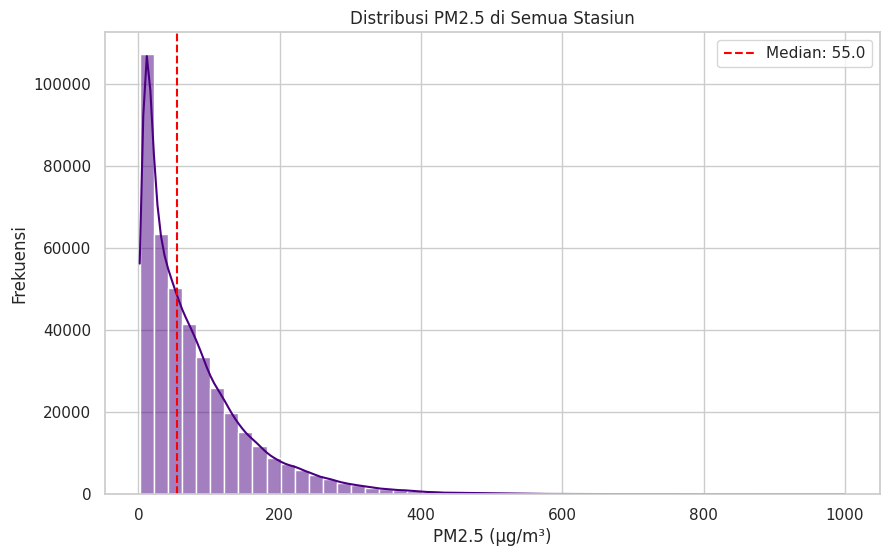

In [87]:
# Hitung dan print statistik
pm25_stats = df_clean['PM2.5'].describe()
print("Statistik Deskriptif PM2.5:\n", pm25_stats.round(2))

# Plot
plt.figure(figsize=(10,6))
sns.histplot(df_clean['PM2.5'], bins=50, kde=True, color='#4B0082')
plt.title('Distribusi PM2.5 di Semua Stasiun')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frekuensi')
plt.axvline(pm25_stats['50%'], color='red', linestyle='--', label=f'Median: {pm25_stats["50%"]:.1f}')
plt.legend()
plt.show()

### Explore Pola Arah Angin (wd) Dominan


5 Arah Angin Dominan:
 wd
NE     44374
ENE    33527
NW     31802
N      30283
E      29096
Name: count, dtype: int64


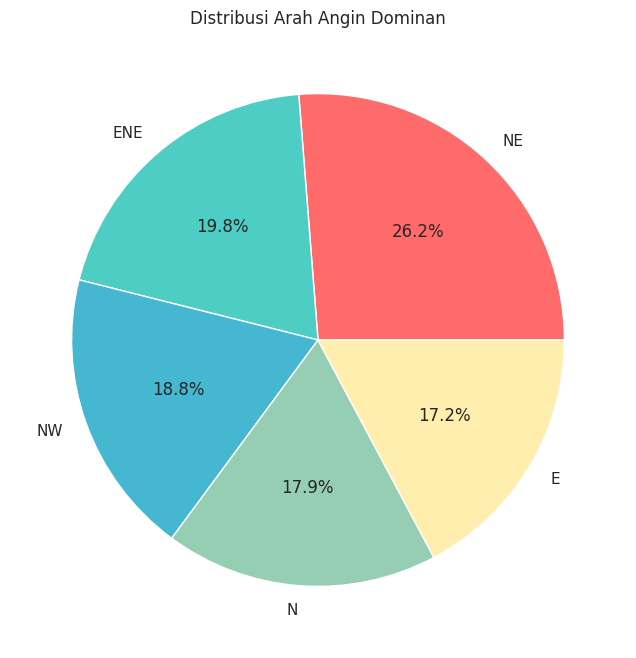

In [84]:
# Hitung dan print 5 arah angin terbanyak
wind_counts = df_clean['wd'].value_counts().nlargest(5)
print("\n5 Arah Angin Dominan:\n", wind_counts)

# Plot
plt.figure(figsize=(8,8))
plt.pie(wind_counts, labels=wind_counts.index, autopct='%1.1f%%',
        colors=['#FF6B6B','#4ECDC4','#45B7D1','#96CEB4','#FFEEAD'])
plt.title('Distribusi Arah Angin Dominan')
plt.show()

### Explore Pola Harian PM2.5


 Rata-Rata PM2.5 per Jam:
 hour
0     87.59
1     86.60
2     84.56
3     82.06
4     79.34
5     76.44
6     74.28
7     73.31
8     74.58
9     76.10
10    77.17
11    77.40
12    76.91
13    76.27
14    75.37
15    74.57
16    74.14
17    75.41
18    78.07
19    82.54
20    86.60
21    88.83
22    88.94
23    88.66
Name: PM2.5, dtype: float64


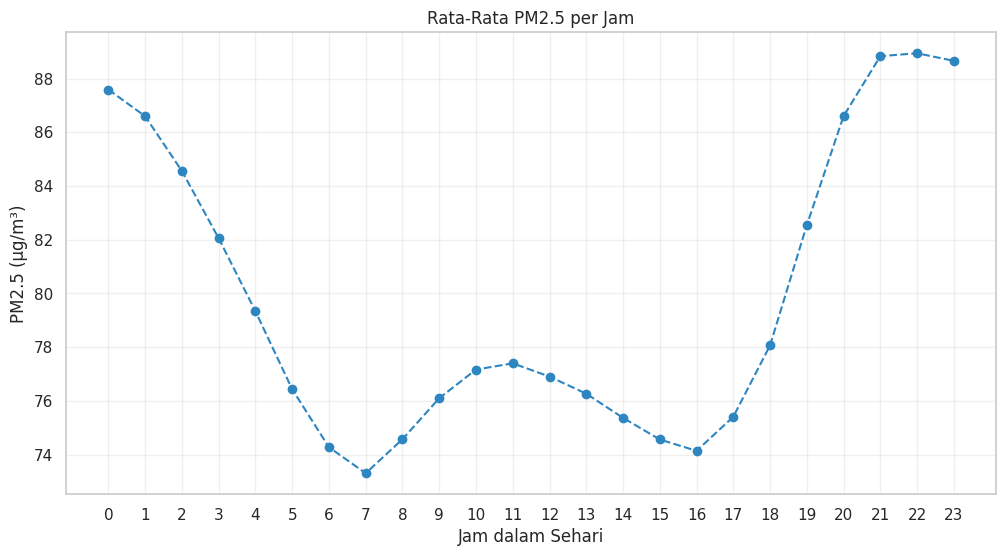

In [86]:
# Hitung dan print rata-rata per jam
hourly_avg = df_clean.groupby('hour')['PM2.5'].mean()
print("\n Rata-Rata PM2.5 per Jam:\n", hourly_avg.round(2))

# Plot
plt.figure(figsize=(12,6))
hourly_avg.plot(marker='o', color='#2E86C1', linestyle='--')
plt.title('Rata-Rata PM2.5 per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.show()

In [90]:
df_clean.info()
df_clean.to_csv('main_data.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 411763 entries, 0 to 420744
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        411763 non-null  int64         
 1   year      411763 non-null  int16         
 2   month     411763 non-null  int8          
 3   day       411763 non-null  int8          
 4   hour      411763 non-null  int8          
 5   PM2.5     411763 non-null  float64       
 6   PM10      411547 non-null  float64       
 7   SO2       411763 non-null  float64       
 8   NO2       411763 non-null  float64       
 9   CO        411763 non-null  float64       
 10  O3        411763 non-null  float64       
 11  TEMP      411763 non-null  float64       
 12  PRES      411763 non-null  float64       
 13  DEWP      411763 non-null  float64       
 14  RAIN      411763 non-null  float64       
 15  wd        411763 non-null  object        
 16  WSPM      411763 non-null  float64       
 

**Insight:**
- Rata-rata distribusi PM2.5 yaitu 79.84 µg/m³ (melebihi 3x batas aman WHO harian: 25 µg/m³).
- Nilai maksimum PM2.5 mencapai 999 µg/m³ yang perlu validasi karena kemungkinan kesalahan input sensor.
- Arah angin dominan yaitu:
  - Timur Laut (NE): 44,374 kejadian
  - Timur-Timur Laut (ENE): 33,527 kejadian
  - Barat Laut (NW): 31,802 kejadian
- Pola harian PM2.5 yaitu:
  - Terendah pada jam 6-7 Pagi: ~74 µg/m³ (aktivitas masih rendah + angin pagi).
  - Tertinggi pada jam 10-11 Malam: ~88-89 µg/m³ (akumulasi emisi sepanjang hari + penurunan kecepatan angin).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren bulanan rata-rata PM2.5 di stasiun perkotaan (Aotizhongxin) vs. pinggiran (Huairou) dari 2013-2017?

Rata-Rata PM2.5 Bulanan (2013-2017):
station     Aotizhongxin  Huairou
datetime                         
2013-03-31         110.1     98.3
2013-04-30          62.8     57.5
2013-05-31          85.0     72.2
2013-06-30         106.2     76.7
2013-07-31          68.9     62.1
2013-08-31          62.2     56.2
2013-09-30          79.2     69.0
2013-10-31          95.2     77.6
2013-11-30          77.5     58.6
2013-12-31          76.8     59.9
2014-01-31          95.7     86.7
2014-02-28         144.4    147.7
2014-03-31          98.9     90.2
2014-04-30         100.8     84.9
2014-05-31          71.6     52.2
2014-06-30          59.7     45.9
2014-07-31          93.4     96.5
2014-08-31          68.1     54.7
2014-09-30          70.0     60.2
2014-10-31         127.7     96.9
2014-11-30          93.7     67.8
2014-12-31          55.6     44.6
2015-01-31          91.6     80.5
2015-02-28          85.5     80.1
2015-03-31          88.3     86.7
2015-04-30          75.7     69.7
2015-05-31 

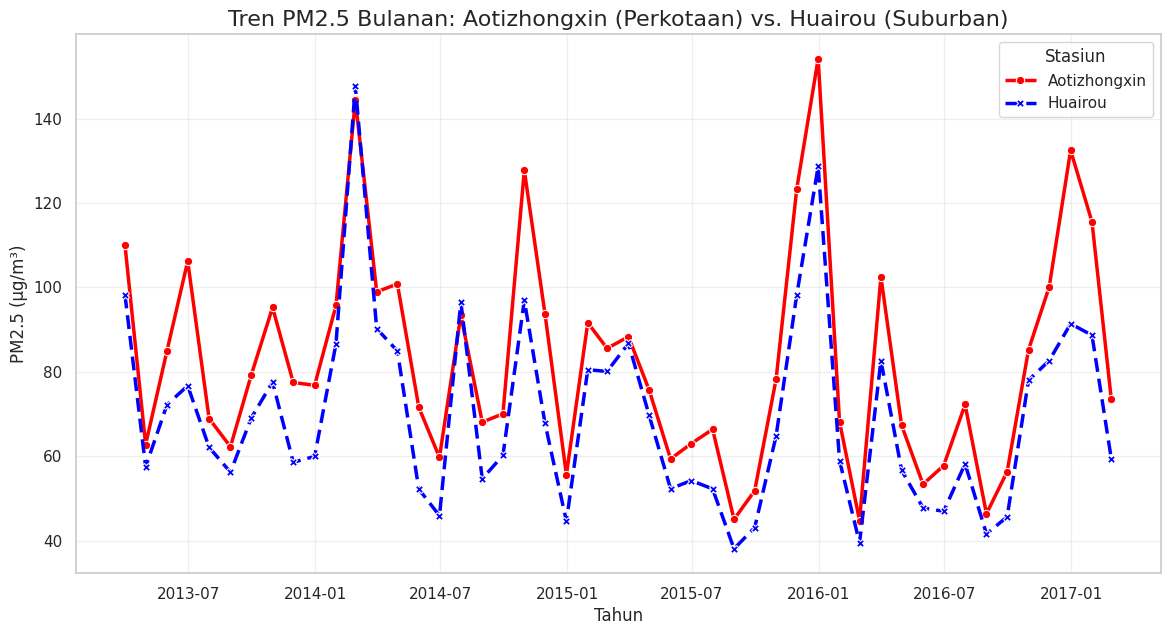

In [97]:
# Filter data dan konversi ke string
df_tren = df_clean[df_clean['station'].isin(['Aotizhongxin', 'Huairou'])].copy()
df_tren['station'] = df_tren['station'].astype(str)

# Hitung rata-rata bulanan
monthly_pm25 = df_tren.groupby(
    ['station', pd.Grouper(key='datetime', freq='ME')],
    observed=True
)['PM2.5'].mean().reset_index()

# Print nilai bulanan
print("Rata-Rata PM2.5 Bulanan (2013-2017):")
print(monthly_pm25.pivot(index='datetime', columns='station', values='PM2.5').round(1))

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_pm25,
    x='datetime',
    y='PM2.5',
    hue='station',
    style='station',
    palette={'Aotizhongxin': 'red', 'Huairou': 'blue'},
    markers=True,
    dashes=[(2,0), (4,2)],  # Garis putus untuk Huairou
    linewidth=2.5
)
plt.title('Tren PM2.5 Bulanan: Aotizhongxin (Perkotaan) vs. Huairou (Suburban)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.legend(title='Stasiun', title_fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**Insight:**
- Aotizhongxin (Perkotaan) 10-40% relatif lebih tinggi, contoh: Okt 2014: 127.7 vs 96.9 µg/m³ (31.7% lebih tinggi).  
- Huairou (Suburban) relatif lebih rendah.  
- Pada musim dingin nilai PM2.5 tinggi di kedua lokasi.

### Pertanyaan 2: Apakah kecepatan angin (WSPM) dan suhu (TEMP) berkorelasi signifikan dengan tingkat PM2.5 di stasiun Dongsi?

Matriks Korelasi (Dongsi):
        PM2.5  WSPM  TEMP
PM2.5   1.00 -0.30 -0.14
WSPM   -0.30  1.00  0.05
TEMP   -0.14  0.05  1.00


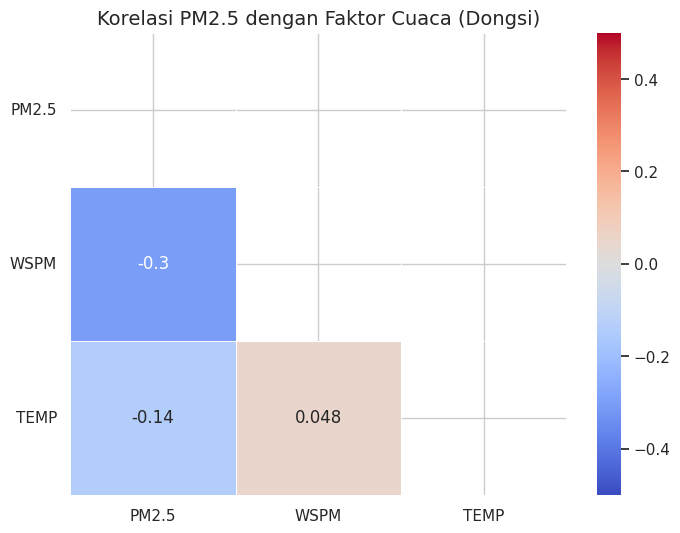

Rata-Rata PM2.5 saat angin ≤4 m/s: 90.4 µg/m³
Rata-Rata PM2.5 saat angin >4 m/s: 30.3 µg/m³
Penurunan: 66.5%


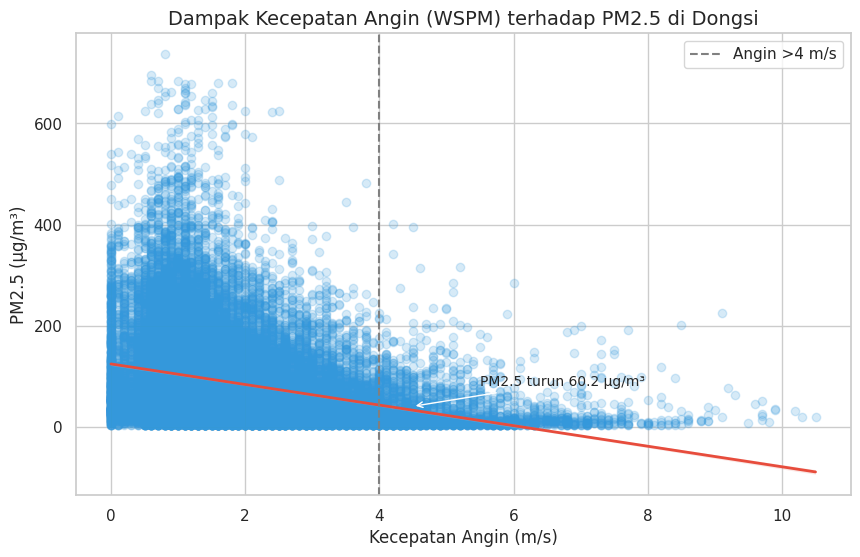

In [105]:
# Hitung korelasi
corr_matrix = df_dongsi[['PM2.5', 'WSPM', 'TEMP']].corr()
print("Matriks Korelasi (Dongsi):\n", corr_matrix.round(2))

# Mask hanya segitiga atas (termasuk diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-0.5,
    vmax=0.5,
    mask=mask,
    linewidths=0.5,
    cbar=True
)
plt.title('Korelasi PM2.5 dengan Faktor Cuaca (Dongsi)', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

# Hitung rata-rata PM2.5 saat WSPM <=4 vs >4
pm25_low_wind = df_dongsi[df_dongsi['WSPM'] <= 4]['PM2.5'].mean()
pm25_high_wind = df_dongsi[df_dongsi['WSPM'] > 4]['PM2.5'].mean()

print(f"Rata-Rata PM2.5 saat angin ≤4 m/s: {pm25_low_wind:.1f} µg/m³")
print(f"Rata-Rata PM2.5 saat angin >4 m/s: {pm25_high_wind:.1f} µg/m³")
print(f"Penurunan: {((pm25_low_wind - pm25_high_wind)/pm25_low_wind*100):.1f}%")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_dongsi,
    x='WSPM',
    y='PM2.5',
    scatter_kws={'alpha': 0.2, 'color': '#3498db'},
    line_kws={'color': '#e74c3c', 'linewidth': 2}
)

# Tambahkan garis vertikal di WSPM=4
plt.axvline(x=4, color='grey', linestyle='--', label='Angin >4 m/s')

# Anotasi
plt.annotate(
    f'PM2.5 turun {pm25_low_wind - pm25_high_wind:.1f} µg/m³',
    xy=(4.5, pm25_high_wind + 10),
    xytext=(5.5, pm25_high_wind + 50),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10
)

plt.title('Dampak Kecepatan Angin (WSPM) terhadap PM2.5 di Dongsi', fontsize=14)
plt.xlabel('Kecepatan Angin (m/s)', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.legend()
plt.show()

**Insight:**
- Kecepatan angin (WSPM) menjadi faktor utama penentu tingkat PM2.5 di Dongsi. Saat angin bertiup >4 m/s, polusi turun drastis 66.5% (dari 90.4 menjadi 30.3 µg/m³), tetapi kondisi ini hanya terjadi 8% dari total waktu.
- Suhu (TEMP) memiliki pengaruh kecil, dengan korelasi lemah (-0.14) terhadap PM2.5. Data juga menunjukkan adanya outlier ekstrem (PM2.5 = 999 µg/m³) yang diduga noise sensor.

## Analisis Lanjutan (Opsional)

In [106]:
stations_coords = {
    'Aotizhongxin': [39.9042, 116.4074],
    'Dongsi': [39.9289, 116.4163],
    'Huairou': [40.315, 116.632],
    'Dingling': [40.286, 116.206],
    'Gucheng': [39.913, 116.184],
}

# Hitung rata-rata PM2.5 per stasiun
pm25_avg = df_clean.groupby('station')['PM2.5'].mean().reset_index()

# Plot peta interaktif
import folium
m = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

for _, row in pm25_avg.iterrows():
    station = row['station']
    pm25 = row['PM2.5']
    lat, lon = stations_coords.get(station, [None, None])

    if lat and lon:
        folium.CircleMarker(
            location=[lat, lon],
            radius=pm25/5,
            color='red',
            fill=True,
            tooltip=f"{station}: {pm25:.1f} µg/m³"
        ).add_to(m)

m.save('pollution_map.html')
m

<ipython-input-106-1070e9e89df1>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pm25_avg = df_clean.groupby('station')['PM2.5'].mean().reset_index()


Kategori Polusi per Stasiun:
          station      PM2.5 kategori
3          Dongsi  86.242924   Sedang
11  Wanshouxigong  85.074581   Sedang
7    Nongzhanguan  84.879242   Sedang
5         Gucheng  83.899584   Sedang
10         Wanliu  83.423725   Sedang
4        Guanyuan  82.967321   Sedang
0    Aotizhongxin  82.821793   Sedang
9         Tiantan  82.211320   Sedang
8          Shunyi  79.532633   Sedang
1       Changping  71.137689   Sedang
6         Huairou  69.658824   Rendah
2        Dingling  66.024689   Rendah


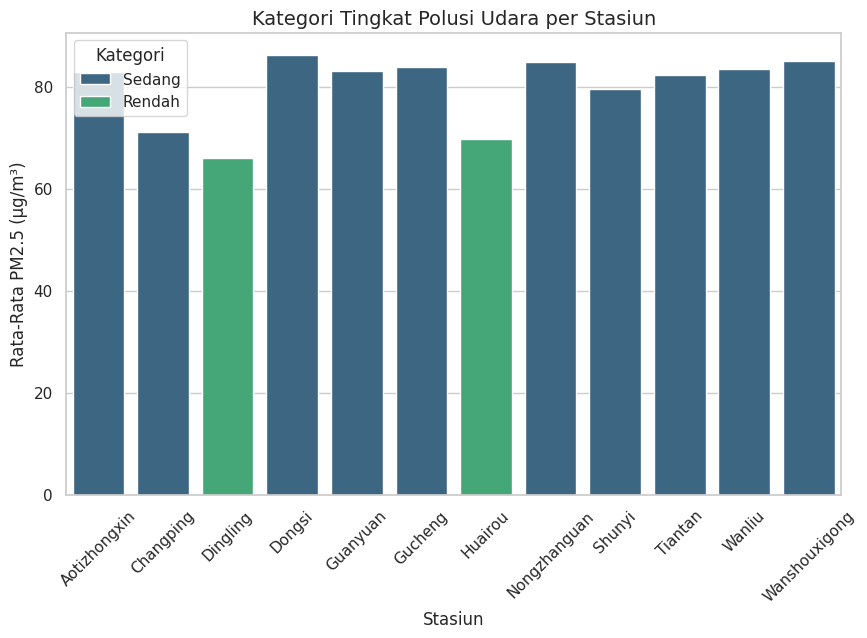

In [107]:
# Kelompokkan stasiun ke dalam 3 kategori polusi
def categorize_pollution(pm25):
    if pm25 > 90:
        return 'Tinggi'
    elif pm25 > 70:
        return 'Sedang'
    else:
        return 'Rendah'

pm25_avg['kategori'] = pm25_avg['PM2.5'].apply(categorize_pollution)

# Print hasil clustering
print("Kategori Polusi per Stasiun:")
print(pm25_avg[['station', 'PM2.5', 'kategori']].sort_values('PM2.5', ascending=False))

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=pm25_avg, x='station', y='PM2.5', hue='kategori', palette='viridis', dodge=False)
plt.title('Kategori Tingkat Polusi Udara per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-Rata PM2.5 (µg/m³)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Kategori')
plt.show()

## Conclusion

- Polusi PM2.5 di Aotizhongxin (perkotaan) relatif lebih tinggi daripada Huairou (suburban), dengan puncak 144.4 µg/m³ di musim dingin (Feb 2014).
- Aning memiliki korelasi negatif dengan nilai korelasi -0,30 yang menunjukkan bahwa semakin kencang angin, semakin rendah PM2.5. Angin >4 m/s turunkan PM2.5 66.5% (dari 90.4 ke 30.3 µg/m³), tetapi hanya terjadi 8% waktu. Suhu berkorelasi negatif yaitu -0.14 sehingga mempengaruhi polusi tetapi tidak signifikan.